In [1]:
#Modèle 1 : Régression logistique – Version A1
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,  # AUC-PR
    confusion_matrix,
    classification_report,
    brier_score_loss
)


In [2]:
#Charger les bases A1 (train/test bruts)
base_path = "../BASES_FINALES_B"  # adapte si besoin

X_train_A1 = pd.read_csv(f"{base_path}/X_train_A1_raw.csv")
y_train_A  = pd.read_csv(f"{base_path}/y_train_A_raw.csv")

X_test_raw = pd.read_csv(f"{base_path}/X_test_raw.csv")
y_test     = pd.read_csv(f"{base_path}/y_test.csv")

X_train_A1.shape, y_train_A.shape, X_test_raw.shape, y_test.shape


((3390, 17), (3390, 1), (848, 17), (848, 1))

In [3]:
# applatement des variables cibles aux datasets d'entrainement
y_train_A = y_train_A.squeeze()
y_test    = y_test.squeeze()


In [4]:
#Vérification la distribution de la cible (déséquilibre)
print("Train A1 :")
print(y_train_A.value_counts(normalize=True) * 100)

print("\nTest :")
print(y_test.value_counts(normalize=True) * 100)


Train A1 :
maladie_cardiaque_10ans
0.0    84.80826
1.0    15.19174
Name: proportion, dtype: float64

Test :
maladie_cardiaque_10ans
0.0    84.787736
1.0    15.212264
Name: proportion, dtype: float64


In [5]:
#Définition fonction d’évaluation standard
def eval_classification(y_true, y_pred, y_proba, model_name=""):
    """
    y_true  : vraies étiquettes (0/1)
    y_pred  : classes prédites (0/1)
    y_proba : probas prédites pour la classe 1
    """
    acc  = accuracy_score(y_true, y_pred)
    rec  = recall_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    f1   = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_proba)
    auc_pr  = average_precision_score(y_true, y_proba)
    brier   = brier_score_loss(y_true, y_proba)
    cm      = confusion_matrix(y_true, y_pred)

    print(f"====== Résultats : {model_name} ======")
    print("Matrice de confusion (rows = vrai, cols = prédit) :")
    print(cm)
    print("\nAccuracy      :", round(acc, 3))
    print("Recall        :", round(rec, 3))
    print("Precision     :", round(prec, 3))
    print("F1-score      :", round(f1, 3))
    print("AUC-ROC       :", round(auc_roc, 3))
    print("AUC-PR        :", round(auc_pr, 3))
    print("Brier score   :", round(brier, 3))
    print("\nClassification report :")
    print(classification_report(y_true, y_pred, digits=3))

    # On retourne aussi les scores dans un dict pour construire plus tard un tableau de synthèse
    return {
        "model": model_name,
        "accuracy": acc,
        "recall": rec,
        "precision": prec,
        "f1": f1,
        "auc_roc": auc_roc,
        "auc_pr": auc_pr,
        "brier": brier
    }


In [6]:
#Entraîner la Régression Logistique (A1 : non SMOTE, non scaling)
logit_A1 = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",      # solide pour ce type de données
    random_state=42
)

logit_A1.fit(X_train_A1, y_train_A)


c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
#Prédictions sur le jeu de test
y_pred_A1 = logit_A1.predict(X_test_raw)
y_proba_A1 = logit_A1.predict_proba(X_test_raw)[:, 1]

#Évaluation 
results_A1 = eval_classification(
    y_true=y_test,
    y_pred=y_pred_A1,
    y_proba=y_proba_A1,
    model_name="LOGIT_A1 (non SMOTE, non scalé)"
)



====== Résultats : LOGIT_A1 (non SMOTE, non scalé) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[706  13]
 [121   8]]

Accuracy      : 0.842
Recall        : 0.062
Precision     : 0.381
F1-score      : 0.107
AUC-ROC       : 0.696
AUC-PR        : 0.286
Brier score   : 0.123

Classification report :
              precision    recall  f1-score   support

         0.0      0.854     0.982     0.913       719
         1.0      0.381     0.062     0.107       129

    accuracy                          0.842       848
   macro avg      0.617     0.522     0.510       848
weighted avg      0.782     0.842     0.791       848



In [8]:
#MODÈLE 2 — LOGIT_A2 : Régression logistique – Version A2 (non SMOTE, scaling)
#Charger les bases A2 (train/test scalés)   
import pandas as pd

base_path = "../BASES_FINALES_B"  # adapte si nécessaire

X_train_A2 = pd.read_csv(f"{base_path}/X_train_A2_scaled.csv")
y_train_A  = pd.read_csv(f"{base_path}/y_train_A_raw.csv")

X_test_scaled = pd.read_csv(f"{base_path}/X_test_scaled.csv")
y_test        = pd.read_csv(f"{base_path}/y_test.csv")

# convertir cibles en vecteur
y_train_A = y_train_A.squeeze()
y_test    = y_test.squeeze()

X_train_A2.shape, X_test_scaled.shape, y_train_A.shape, y_test.shape


((3390, 17), (848, 17), (3390,), (848,))

In [9]:
#Vérifier que les données sont bien scalées
X_train_A2.describe().T


,count,mean,std,min,25%,50%,75%,max
age,3390.0,-3.164954e-16,1.000148,-2.057864,-0.890345,-0.073082,0.744181,2.378708
cigarettes_par_jour,3390.0,2.095996e-18,1.000148,-0.751499,-0.751499,-0.751499,0.921185,5.102894
cholesterol_total,3390.0,-1.236638e-16,1.000148,-2.940706,-0.687939,-0.050793,0.586353,8.277616
tension_sys,3390.0,-4.904631e-16,1.000148,-2.221949,-0.699199,-0.199192,0.528092,7.391831
tension_dia,3390.0,4.632152e-16,1.000148,-2.932735,-0.701441,-0.069943,0.561555,4.476844
imc,3390.0,-1.886397e-17,1.000148,-2.495116,-0.664163,-0.100793,0.546961,7.524130
frequence_cardiaque,3390.0,-7.755186e-17,1.000148,-2.656700,-0.659185,-0.076576,0.589262,5.583050
glucose,3390.0,-2.452316e-16,1.000148,-1.808864,-0.417677,-0.156829,0.147493,13.581143


In [10]:
#Entraîner la régression logistique LOGIT_A2
from sklearn.linear_model import LogisticRegression

logit_A2 = LogisticRegression(
    max_iter=2000,
    solver="lbfgs",
    random_state=42
)

logit_A2.fit(X_train_A2, y_train_A)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [11]:
#predire sur le jeu de test
y_pred_A2  = logit_A2.predict(X_test_scaled)
y_proba_A2 = logit_A2.predict_proba(X_test_scaled)[:, 1]


In [12]:
#Évaluation avec la fonction standard
results_A2 = eval_classification(
    y_true=y_test,
    y_pred=y_pred_A2,
    y_proba=y_proba_A2,
    model_name="LOGIT_A2 (non SMOTE, SCALÉ)"
)


====== Résultats : LOGIT_A2 (non SMOTE, SCALÉ) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[708  11]
 [122   7]]

Accuracy      : 0.843
Recall        : 0.054
Precision     : 0.389
F1-score      : 0.095
AUC-ROC       : 0.695
AUC-PR        : 0.293
Brier score   : 0.122

Classification report :
              precision    recall  f1-score   support

         0.0      0.853     0.985     0.914       719
         1.0      0.389     0.054     0.095       129

    accuracy                          0.843       848
   macro avg      0.621     0.519     0.505       848
weighted avg      0.782     0.843     0.790       848



In [13]:
#MODÈLE 3 — LOGIT_B1 : Régression logistique – Version B1 (SMOTE, non scaling)
#Charger les bases B1 (train/test bruts)
import pandas as pd

base_path = "../BASES_FINALES_B"

# Train SMOTE non scalé
X_train_B1 = pd.read_csv(f"{base_path}/X_train_B1_smote.csv")
y_train_B1 = pd.read_csv(f"{base_path}/y_train_B_smote.csv").squeeze()

# Test non scalé
X_test_raw = pd.read_csv(f"{base_path}/X_test_raw.csv")
y_test     = pd.read_csv(f"{base_path}/y_test.csv").squeeze()

X_train_B1.shape, y_train_B1.shape, X_test_raw.shape, y_test.shape


((5750, 17), (5750,), (848, 17), (848,))

In [14]:
#Vérifier que SMOTE a bien équilibré la cible
y_train_B1.value_counts(normalize=True)*100


maladie_cardiaque_10ans
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64

In [15]:
#Entraîner le modèle LOGIT_B1
from sklearn.linear_model import LogisticRegression

logit_B1 = LogisticRegression(
    max_iter=2000,
    solver="lbfgs",
    random_state=42
)

logit_B1.fit(X_train_B1, y_train_B1)


c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [16]:
#Prédictions sur le test non scalé
y_pred_B1  = logit_B1.predict(X_test_raw)
y_proba_B1 = logit_B1.predict_proba(X_test_raw)[:, 1]


In [17]:
#Évaluation complète
results_B1 = eval_classification(
    y_true=y_test,
    y_pred=y_pred_B1,
    y_proba=y_proba_B1,
    model_name="LOGIT_B1 (SMOTE, non scalé)"
)


====== Résultats : LOGIT_B1 (SMOTE, non scalé) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[533 186]
 [ 72  57]]

Accuracy      : 0.696
Recall        : 0.442
Precision     : 0.235
F1-score      : 0.306
AUC-ROC       : 0.677
AUC-PR        : 0.285
Brier score   : 0.195

Classification report :
              precision    recall  f1-score   support

         0.0      0.881     0.741     0.805       719
         1.0      0.235     0.442     0.306       129

    accuracy                          0.696       848
   macro avg      0.558     0.592     0.556       848
weighted avg      0.783     0.696     0.729       848



In [18]:
#MODÈLE 4 — LOGIT_B2 : Régression logistique – Version B2 (SMOTE, scaling)
#Charger les bases B2 (train/test scalés)   
import pandas as pd

base_path = "../BASES_FINALES_B"

# Train SMOTE + SCALING
X_train_B2 = pd.read_csv(f"{base_path}/X_train_B2_smote_scaled.csv")
y_train_B2 = pd.read_csv(f"{base_path}/y_train_B_smote.csv").squeeze()

# Test scalé
X_test_scaled = pd.read_csv(f"{base_path}/X_test_scaled.csv")
y_test        = pd.read_csv(f"{base_path}/y_test.csv").squeeze()

X_train_B2.shape, y_train_B2.shape, X_test_scaled.shape, y_test.shape


((5750, 17), (5750,), (848, 17), (848,))

In [19]:
#Entraîner le modèle LOGIT_B2
from sklearn.linear_model import LogisticRegression

logit_B2 = LogisticRegression(
    max_iter=2000,
    solver="lbfgs",
    random_state=42
)

logit_B2.fit(X_train_B2, y_train_B2)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [20]:
#Prédictions sur le test scalé
y_pred_B2  = logit_B2.predict(X_test_scaled)
y_proba_B2 = logit_B2.predict_proba(X_test_scaled)[:, 1]
#Évaluation complète    
results_B2 = eval_classification(
    y_true=y_test,
    y_pred=y_pred_B2,
    y_proba=y_proba_B2,
    model_name="LOGIT_B2 (SMOTE + SCALING)"
)


====== Résultats : LOGIT_B2 (SMOTE + SCALING) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[497 222]
 [ 64  65]]

Accuracy      : 0.663
Recall        : 0.504
Precision     : 0.226
F1-score      : 0.312
AUC-ROC       : 0.677
AUC-PR        : 0.285
Brier score   : 0.213

Classification report :
              precision    recall  f1-score   support

         0.0      0.886     0.691     0.777       719
         1.0      0.226     0.504     0.312       129

    accuracy                          0.663       848
   macro avg      0.556     0.598     0.545       848
weighted avg      0.786     0.663     0.706       848



In [21]:
#Random forest ((4 SOUS-MODÈLES))
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, brier_score_loss



In [22]:
#Fonction d’évaluation standard
def eval_rf(y_true, y_pred, y_proba, model_name):
    print(f"\n====== Résultats : {model_name} ======")

    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    print("Matrice de confusion (rows = vrai, cols = prédit) :")
    print(cm)

    # Scores
    acc = (y_pred == y_true).mean()
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1]+cm[0,1])>0 else 0
    f1 = 2*precision*recall/(precision+recall) if (precision+recall)>0 else 0
    aucroc = roc_auc_score(y_true, y_proba)
    aucpr = average_precision_score(y_true, y_proba)
    brier = brier_score_loss(y_true, y_proba)

    print(f"\nAccuracy      : {acc:.3f}")
    print(f"Recall        : {recall:.3f}")
    print(f"Precision     : {precision:.3f}")
    print(f"F1-score      : {f1:.3f}")
    print(f"AUC-ROC       : {aucroc:.3f}")
    print(f"AUC-PR        : {aucpr:.3f}")
    print(f"Brier score   : {brier:.3f}")

    print("\nClassification report :")
    print(classification_report(y_true, y_pred))

    return {
        "model": model_name,
        "accuracy": acc,
        "recall": recall,
        "precision": precision,
        "f1": f1,
        "aucroc": aucroc,
        "aucpr": aucpr,
        "brier": brier
    }


In [23]:
#Chargement des bases 
base_path = "../BASES_FINALES_B"

# A1 / A2
X_train_A_raw   = pd.read_csv(f"{base_path}/X_train_A1_raw.csv")
y_train_A       = pd.read_csv(f"{base_path}/y_train_A_raw.csv").squeeze()
X_test_raw      = pd.read_csv(f"{base_path}/X_test_raw.csv")
X_test_scaled   = pd.read_csv(f"{base_path}/X_test_scaled.csv")
y_test          = pd.read_csv(f"{base_path}/y_test.csv").squeeze()

# B1 / B2
X_train_B1      = pd.read_csv(f"{base_path}/X_train_B1_smote.csv")
X_train_B2      = pd.read_csv(f"{base_path}/X_train_B2_smote_scaled.csv")
y_train_B       = pd.read_csv(f"{base_path}/y_train_B_smote.csv").squeeze()


In [24]:
#4 modèles Random Forest (complets avec évaluation)

# RF_A1 : non SMOTE, non scalé
rf_A1 = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    class_weight=None,
    random_state=42
)

rf_A1.fit(X_train_A_raw, y_train_A)

y_pred = rf_A1.predict(X_test_raw)
y_proba = rf_A1.predict_proba(X_test_raw)[:,1]

results_RF_A1 = eval_rf(y_test, y_pred, y_proba, "RF_A1 (non SMOTE, non scalé)")



====== Résultats : RF_A1 (non SMOTE, non scalé) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[710   9]
 [126   3]]

Accuracy      : 0.841
Recall        : 0.023
Precision     : 0.250
F1-score      : 0.043
AUC-ROC       : 0.648
AUC-PR        : 0.238
Brier score   : 0.129

Classification report :
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       719
         1.0       0.25      0.02      0.04       129

    accuracy                           0.84       848
   macro avg       0.55      0.51      0.48       848
weighted avg       0.76      0.84      0.78       848



In [25]:
#RF_A2 — Sans SMOTE, SCALING 
rf_A2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    class_weight=None,
    random_state=42
)

rf_A2.fit(X_train_A_raw, y_train_A)

y_pred = rf_A2.predict(X_test_scaled)
y_proba = rf_A2.predict_proba(X_test_scaled)[:,1]

results_RF_A2 = eval_rf(y_test, y_pred, y_proba, "RF_A2 (non SMOTE, SCALÉ)")



====== Résultats : RF_A2 (non SMOTE, SCALÉ) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[719   0]
 [129   0]]

Accuracy      : 0.848
Recall        : 0.000
Precision     : 0.000
F1-score      : 0.000
AUC-ROC       : 0.533
AUC-PR        : 0.164
Brier score   : 0.209

Classification report :
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       719
         1.0       0.00      0.00      0.00       129

    accuracy                           0.85       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.72      0.85      0.78       848



c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [26]:
#RF_B1 — SMOTE, non scalé
rf_B1 = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

rf_B1.fit(X_train_B1, y_train_B)

y_pred = rf_B1.predict(X_test_raw)
y_proba = rf_B1.predict_proba(X_test_raw)[:,1]

results_RF_B1 = eval_rf(y_test, y_pred, y_proba, "RF_B1 (SMOTE, non scalé)")



====== Résultats : RF_B1 (SMOTE, non scalé) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[639  80]
 [103  26]]

Accuracy      : 0.784
Recall        : 0.202
Precision     : 0.245
F1-score      : 0.221
AUC-ROC       : 0.657
AUC-PR        : 0.240
Brier score   : 0.153

Classification report :
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       719
         1.0       0.25      0.20      0.22       129

    accuracy                           0.78       848
   macro avg       0.55      0.55      0.55       848
weighted avg       0.77      0.78      0.78       848



In [27]:
#RF_B2 — SMOTE + Scaling
rf_B2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

rf_B2.fit(X_train_B2, y_train_B)

y_pred = rf_B2.predict(X_test_scaled)
y_proba = rf_B2.predict_proba(X_test_scaled)[:,1]

results_RF_B2 = eval_rf(y_test, y_pred, y_proba, "RF_B2 (SMOTE + SCALING)")



====== Résultats : RF_B2 (SMOTE + SCALING) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[570 149]
 [ 77  52]]

Accuracy      : 0.733
Recall        : 0.403
Precision     : 0.259
F1-score      : 0.315
AUC-ROC       : 0.650
AUC-PR        : 0.253
Brier score   : 0.189

Classification report :
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83       719
         1.0       0.26      0.40      0.32       129

    accuracy                           0.73       848
   macro avg       0.57      0.60      0.57       848
weighted avg       0.79      0.73      0.76       848



In [ ]:
# modeles XGBoost Classifier (4 sous-modèles)
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 3.8 MB/s eta 0:00:19
   ---------------------------------------- 0.8/72.0 MB 3.0 MB/s eta 0:00:25
   - -------------------------------------- 1.8/72.0 MB 3.3 MB/s eta 0:00:22
   - -------------------------------------- 2.9/72.0 MB 3.7 MB/s eta 0:00:19
   -- ------------------------------------- 3.9/72.0 MB 4.2 MB/s eta 0:00:17
   -- ------------------------------------- 5.0/72.0 MB 4.2 MB/s eta 0:00:17
   --- ------------------------------------ 6.3/72.0 MB 4.4 MB/s eta 0:00:15
   ---- ----------------------------------- 7.3/72.0 MB 4.5 MB/s eta 0:00:15
   ---- ----------------------------------- 8.7/72.0 MB 4.8 MB/s eta 0:00:14
   ----- ---------------------------------- 10.0/72.0 MB 4.9 MB/s eta 0:00:13
   ------ --------------------------------- 11.0/72.0 MB 4.9 MB/s eta 0:00:13
   ------ --------------------------------- 11.8/72.0 MB 4.9 MB/s eta 0:00:13
   


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# importer les bibliothèques nécessaires
import pandas as pd
import xgboost as xgb
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score, brier_score_loss
)


In [30]:
#fonction d’évaluation standard
def eval_xgb(y_true, y_pred, y_proba, model_name):
    print(f"\n====== Résultats : {model_name} ======")

    cm = confusion_matrix(y_true, y_pred)
    print("Matrice de confusion (rows = vrai, cols = prédit) :")
    print(cm)

    acc = (y_pred == y_true).mean()
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1]+cm[0,1])>0 else 0
    f1 = 2*precision*recall/(precision+recall) if (precision+recall)>0 else 0
    aucroc = roc_auc_score(y_true, y_proba)
    aucpr = average_precision_score(y_true, y_proba)
    brier = brier_score_loss(y_true, y_proba)

    print(f"\nAccuracy      : {acc:.3f}")
    print(f"Recall        : {recall:.3f}")
    print(f"Precision     : {precision:.3f}")
    print(f"F1-score      : {f1:.3f}")
    print(f"AUC-ROC       : {aucroc:.3f}")
    print(f"AUC-PR        : {aucpr:.3f}")
    print(f"Brier score   : {brier:.3f}")

    print("\nClassification report :")
    print(classification_report(y_true, y_pred))

    return {
        "model": model_name,
        "accuracy": acc,
        "recall": recall,
        "precision": precision,
        "f1": f1,
        "aucroc": aucroc,
        "aucpr": aucpr,
        "brier": brier
    }


In [31]:
#charger les données
base_path = "../BASES_FINALES_B"

# A1 / A2
X_train_A_raw   = pd.read_csv(f"{base_path}/X_train_A1_raw.csv")
y_train_A       = pd.read_csv(f"{base_path}/y_train_A_raw.csv").squeeze()
X_test_raw      = pd.read_csv(f"{base_path}/X_test_raw.csv")
X_test_scaled   = pd.read_csv(f"{base_path}/X_test_scaled.csv")
y_test          = pd.read_csv(f"{base_path}/y_test.csv").squeeze()

# B1 / B2
X_train_B1      = pd.read_csv(f"{base_path}/X_train_B1_smote.csv")
X_train_B2      = pd.read_csv(f"{base_path}/X_train_B2_smote_scaled.csv")
y_train_B       = pd.read_csv(f"{base_path}/y_train_B_smote.csv").squeeze()


In [32]:
#PARAMÈTRES XGBOOST (standards, adaptables)
xgb_params = {
    "max_depth": 4,
    "learning_rate": 0.05,
    "n_estimators": 300,
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 42,
}


In [33]:
#MODÈLE 1 — XGB_A1 (Non SMOTE, Non Scalé)
xgb_A1 = xgb.XGBClassifier(**xgb_params)
xgb_A1.fit(X_train_A_raw, y_train_A)

y_pred = xgb_A1.predict(X_test_raw)
y_proba = xgb_A1.predict_proba(X_test_raw)[:,1]

results_XGB_A1 = eval_xgb(y_test, y_pred, y_proba, "XGB_A1 (non SMOTE, non scalé)")



====== Résultats : XGB_A1 (non SMOTE, non scalé) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[697  22]
 [117  12]]

Accuracy      : 0.836
Recall        : 0.093
Precision     : 0.353
F1-score      : 0.147
AUC-ROC       : 0.655
AUC-PR        : 0.265
Brier score   : 0.129

Classification report :
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       719
         1.0       0.35      0.09      0.15       129

    accuracy                           0.84       848
   macro avg       0.60      0.53      0.53       848
weighted avg       0.78      0.84      0.79       848



In [34]:
#MODÈLE 2 — XGB_A2 (Non SMOTE, SCALÉ)
xgb_A2 = xgb.XGBClassifier(**xgb_params)
xgb_A2.fit(X_train_A_raw, y_train_A)

y_pred = xgb_A2.predict(X_test_scaled)
y_proba = xgb_A2.predict_proba(X_test_scaled)[:,1]

results_XGB_A2 = eval_xgb(y_test, y_pred, y_proba, "XGB_A2 (non SMOTE, SCALÉ)")



====== Résultats : XGB_A2 (non SMOTE, SCALÉ) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[719   0]
 [129   0]]

Accuracy      : 0.848
Recall        : 0.000
Precision     : 0.000
F1-score      : 0.000
AUC-ROC       : 0.639
AUC-PR        : 0.255
Brier score   : 0.132

Classification report :
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       719
         1.0       0.00      0.00      0.00       129

    accuracy                           0.85       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.72      0.85      0.78       848



c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [35]:
#MODÈLE 3 — XGB_B1 (SMOTE, non scalé)
xgb_B1 = xgb.XGBClassifier(**xgb_params)
xgb_B1.fit(X_train_B1, y_train_B)

y_pred = xgb_B1.predict(X_test_raw)
y_proba = xgb_B1.predict_proba(X_test_raw)[:,1]

results_XGB_B1 = eval_xgb(y_test, y_pred, y_proba, "XGB_B1 (SMOTE, non scalé)")



====== Résultats : XGB_B1 (SMOTE, non scalé) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[624  95]
 [ 94  35]]

Accuracy      : 0.777
Recall        : 0.271
Precision     : 0.269
F1-score      : 0.270
AUC-ROC       : 0.637
AUC-PR        : 0.238
Brier score   : 0.159

Classification report :
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       719
         1.0       0.27      0.27      0.27       129

    accuracy                           0.78       848
   macro avg       0.57      0.57      0.57       848
weighted avg       0.78      0.78      0.78       848



In [36]:
#MODÈLE 4 — XGB_B2 (SMOTE + SCALING)
xgb_B2 = xgb.XGBClassifier(**xgb_params)
xgb_B2.fit(X_train_B2, y_train_B)

y_pred = xgb_B2.predict(X_test_scaled)
y_proba = xgb_B2.predict_proba(X_test_scaled)[:,1]

results_XGB_B2 = eval_xgb(y_test, y_pred, y_proba, "XGB_B2 (SMOTE + SCALING)")



====== Résultats : XGB_B2 (SMOTE + SCALING) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[248 471]
 [ 24 105]]

Accuracy      : 0.416
Recall        : 0.814
Precision     : 0.182
F1-score      : 0.298
AUC-ROC       : 0.622
AUC-PR        : 0.257
Brier score   : 0.368

Classification report :
              precision    recall  f1-score   support

         0.0       0.91      0.34      0.50       719
         1.0       0.18      0.81      0.30       129

    accuracy                           0.42       848
   macro avg       0.55      0.58      0.40       848
weighted avg       0.80      0.42      0.47       848



In [37]:
#IMPORTANCE DES VARIABLES (à mettre dans le mémoire)
importances = pd.DataFrame({
    "variable": X_train_B1.columns,
    "importance": xgb_B2.feature_importances_
}).sort_values("importance", ascending=False)

print(importances.head(20))


                       variable  importance
15             hypertension_1.0    0.223749
8                      sexe_1.0    0.158516
0                           age    0.087211
12                   fumeur_1.0    0.060530
10             niveau_etude_3.0    0.051357
9              niveau_etude_2.0    0.046240
11             niveau_etude_4.0    0.045577
16                  diabete_1.0    0.044302
14           antecedent_avc_1.0    0.043566
1           cigarettes_par_jour    0.039601
13  traitement_hypertenseur_1.0    0.039100
6           frequence_cardiaque    0.038306
7                       glucose    0.031892
3                   tension_sys    0.027094
4                   tension_dia    0.024037
2             cholesterol_total    0.021869
5                           imc    0.017052


In [ ]:
# models GRADIENT BOOSTING


In [38]:
# importation des bibliothèques nécessaires
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score, brier_score_loss
)


In [39]:
#Fonction d’évaluation standard
def eval_gb(y_true, y_pred, y_proba, model_name):
    print(f"\n====== Résultats : {model_name} ======")

    cm = confusion_matrix(y_true, y_pred)
    print("Matrice de confusion (rows = vrai, cols = prédit) :")
    print(cm)

    acc = (y_pred == y_true).mean()
    recall = cm[1,1] / (cm[1,1] + cm[1,0])
    precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1]+cm[0,1])>0 else 0
    f1 = 2*precision*recall/(precision+recall) if (precision+recall)>0 else 0
    aucroc = roc_auc_score(y_true, y_proba)
    aucpr = average_precision_score(y_true, y_proba)
    brier = brier_score_loss(y_true, y_proba)

    print(f"\nAccuracy      : {acc:.3f}")
    print(f"Recall        : {recall:.3f}")
    print(f"Precision     : {precision:.3f}")
    print(f"F1-score      : {f1:.3f}")
    print(f"AUC-ROC       : {aucroc:.3f}")
    print(f"AUC-PR        : {aucpr:.3f}")
    print(f"Brier score   : {brier:.3f}")

    print("\nClassification report :")
    print(classification_report(y_true, y_pred))

    return {
        "model": model_name,
        "accuracy": acc,
        "recall": recall,
        "precision": precision,
        "f1": f1,
        "aucroc": aucroc,
        "aucpr": aucpr,
        "brier": brier
    }


In [40]:
#CHARGEMENT DES DONNÉES
base_path = "../BASES_FINALES_B"

# A1 / A2
X_train_A_raw   = pd.read_csv(f"{base_path}/X_train_A1_raw.csv")
y_train_A       = pd.read_csv(f"{base_path}/y_train_A_raw.csv").squeeze()
X_test_raw      = pd.read_csv(f"{base_path}/X_test_raw.csv")
X_test_scaled   = pd.read_csv(f"{base_path}/X_test_scaled.csv")
y_test          = pd.read_csv(f"{base_path}/y_test.csv").squeeze()

# B1 / B2
X_train_B1      = pd.read_csv(f"{base_path}/X_train_B1_smote.csv")
X_train_B2      = pd.read_csv(f"{base_path}/X_train_B2_smote_scaled.csv")
y_train_B       = pd.read_csv(f"{base_path}/y_train_B_smote.csv").squeeze()


In [41]:
# paramètres Gradient Boosting
gb_params = {
    "learning_rate": 0.05,
    "n_estimators": 300,
    "max_depth": 3,
    "subsample": 0.9,
    "random_state": 42
}


In [42]:
#MODÈLE 1 — GB_A1 (Non SMOTE, Non Scalé)
gb_A1 = GradientBoostingClassifier(**gb_params)
gb_A1.fit(X_train_A_raw, y_train_A)

y_pred = gb_A1.predict(X_test_raw)
y_proba = gb_A1.predict_proba(X_test_raw)[:,1]

results_GB_A1 = eval_gb(y_test, y_pred, y_proba, "GB_A1 (non SMOTE, non scalé)")



====== Résultats : GB_A1 (non SMOTE, non scalé) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[702  17]
 [120   9]]

Accuracy      : 0.838
Recall        : 0.070
Precision     : 0.346
F1-score      : 0.116
AUC-ROC       : 0.657
AUC-PR        : 0.252
Brier score   : 0.129

Classification report :
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       719
         1.0       0.35      0.07      0.12       129

    accuracy                           0.84       848
   macro avg       0.60      0.52      0.51       848
weighted avg       0.78      0.84      0.79       848



In [46]:
#MODÈLE 2 — GB_A2 (Non SMOTE, SCALÉ)
gb_A2 = GradientBoostingClassifier(**gb_params)
gb_A2.fit(X_train_A_raw, y_train_A)

y_pred = gb_A2.predict(X_test_scaled)
y_proba = gb_A2.predict_proba(X_test_scaled)[:,1]

results_GB_A2 = eval_gb(y_test, y_pred, y_proba, "GB_A2 (non SMOTE, SCALÉ)")



====== Résultats : GB_A2 (non SMOTE, SCALÉ) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[  0 719]
 [  0 129]]

Accuracy      : 0.152
Recall        : 1.000
Precision     : 0.152
F1-score      : 0.264
AUC-ROC       : 0.435
AUC-PR        : 0.152
Brier score   : 0.638

Classification report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       719
         1.0       0.15      1.00      0.26       129

    accuracy                           0.15       848
   macro avg       0.08      0.50      0.13       848
weighted avg       0.02      0.15      0.04       848



c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\YOGA Slim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [44]:
#MODÈLE 3 — GB_B1 (SMOTE, Non Scalé)
gb_B1 = GradientBoostingClassifier(**gb_params)
gb_B1.fit(X_train_B1, y_train_B)

y_pred = gb_B1.predict(X_test_raw)
y_proba = gb_B1.predict_proba(X_test_raw)[:,1]

results_GB_B1 = eval_gb(y_test, y_pred, y_proba, "GB_B1 (SMOTE, non scalé)")



====== Résultats : GB_B1 (SMOTE, non scalé) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[622  97]
 [ 91  38]]

Accuracy      : 0.778
Recall        : 0.295
Precision     : 0.281
F1-score      : 0.288
AUC-ROC       : 0.653
AUC-PR        : 0.256
Brier score   : 0.159

Classification report :
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       719
         1.0       0.28      0.29      0.29       129

    accuracy                           0.78       848
   macro avg       0.58      0.58      0.58       848
weighted avg       0.78      0.78      0.78       848



In [45]:
#MODÈLE 4 — GB_B2 (SMOTE + SCALING)
gb_B2 = GradientBoostingClassifier(**gb_params)
gb_B2.fit(X_train_B2, y_train_B)

y_pred = gb_B2.predict(X_test_scaled)
y_proba = gb_B2.predict_proba(X_test_scaled)[:,1]

results_GB_B2 = eval_gb(y_test, y_pred, y_proba, "GB_B2 (SMOTE + SCALING)")



====== Résultats : GB_B2 (SMOTE + SCALING) ======
Matrice de confusion (rows = vrai, cols = prédit) :
[[131 588]
 [ 14 115]]

Accuracy      : 0.290
Recall        : 0.891
Precision     : 0.164
F1-score      : 0.276
AUC-ROC       : 0.617
AUC-PR        : 0.248
Brier score   : 0.436

Classification report :
              precision    recall  f1-score   support

         0.0       0.90      0.18      0.30       719
         1.0       0.16      0.89      0.28       129

    accuracy                           0.29       848
   macro avg       0.53      0.54      0.29       848
weighted avg       0.79      0.29      0.30       848



In [47]:
#courbes ROC et PR pour les modèles GB
#importation des bibliothèques nécessaires
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score,
    RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt


In [53]:
import pandas as pd

# === TRAIN (SMOTE) ===
X_train = pd.read_csv("../BASES_FINALES_B/X_train_B1_smote.csv")
y_train = pd.read_csv("../BASES_FINALES_B/y_train_B_smote.csv")

# === TEST (RAW) ===
X_test  = pd.read_csv("../BASES_FINALES_B/X_test_raw.csv")
y_test  = pd.read_csv("../BASES_FINALES_B/y_test.csv")

# Convertir en vecteur
y_train = y_train.values.ravel()
y_test  = y_test.values.ravel()

print("Shapes :")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


Shapes :
(5750, 17) (5750,)
(848, 17) (848,)


In [54]:
#entraînement du modèle GB_B1
from sklearn.ensemble import GradientBoostingClassifier

# Meilleur modèle identifié
gb_best = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_best.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


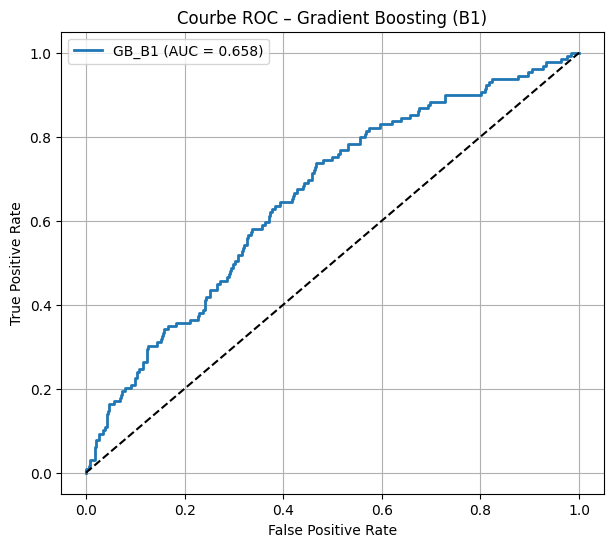

In [55]:
#Courbe ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Probabilités
y_proba = gb_best.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'GB_B1 (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC – Gradient Boosting (B1)")
plt.legend()
plt.grid(True)
plt.show()


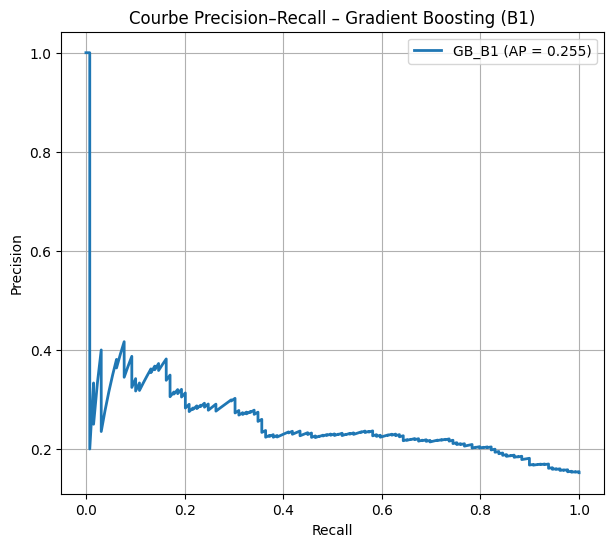

In [56]:
# Courbe Precision–Recall
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, label=f'GB_B1 (AP = {ap:.3f})', linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Courbe Precision–Recall – Gradient Boosting (B1)")
plt.legend()
plt.grid(True)
plt.show()


In [57]:
#Trouver le meilleur seuil décisionnel
from sklearn.metrics import f1_score
import numpy as np

best_f1 = 0
best_threshold = 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Meilleur seuil = {best_threshold:.3f}")
print(f"F1-score associé = {best_f1:.3f}")


Meilleur seuil = 0.245
F1-score associé = 0.339


In [58]:
#Modèle SVM
#Imports et fonction d’évaluation
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score, precision_score,
    f1_score, roc_auc_score, average_precision_score, brier_score_loss,
    classification_report
)

def eval_model(name, y_true, y_pred, y_prob):
    print(f"\n====== Résultats : {name} ======")

    cm = confusion_matrix(y_true, y_pred)
    print("Matrice de confusion (vrai x prédit) :")
    print(cm)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    auc_pr = average_precision_score(y_true, y_prob)
    brier = brier_score_loss(y_true, y_prob)

    print(f"\nAccuracy      : {acc:.3f}")
    print(f"Recall        : {rec:.3f}")
    print(f"Precision     : {prec:.3f}")
    print(f"F1-score      : {f1:.3f}")
    print(f"AUC-ROC       : {auc:.3f}")
    print(f"AUC-PR        : {auc_pr:.3f}")
    print(f"Brier score   : {brier:.3f}")

    print("\nClassification report :")
    print(classification_report(y_true, y_pred, zero_division=0))



In [60]:
#Chargement des données
path = "C:/Users/YOGA Slim/Documents/GitHub/projet-maladie-cardiaque-IA/BASES_FINALES_B/"

X_train_A1 = pd.read_csv(path + "X_train_A1_raw.csv")
X_train_A2 = pd.read_csv(path + "X_train_A2_scaled.csv")
X_train_B1 = pd.read_csv(path + "X_train_B1_smote.csv")
X_train_B2 = pd.read_csv(path + "X_train_B2_smote_scaled.csv")

y_train_A = pd.read_csv(path + "y_train_A_raw.csv").values.ravel()
y_train_B = pd.read_csv(path + "y_train_B_smote.csv").values.ravel()

X_test_raw = pd.read_csv(path + "X_test_raw.csv")
X_test_scaled = pd.read_csv(path + "X_test_scaled.csv")
y_test = pd.read_csv(path + "y_test.csv").values.ravel()


In [65]:
# modèles SVM (4 sous-modèles)
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    classification_report, confusion_matrix
)
import numpy as np

# -----------------------------
# FONCTION D’ÉVALUATION GÉNÉRALE
# -----------------------------

def evaluate_svm(X_train, y_train, X_test, y_test, model_name):
    print("\n" + "="*15 + f" Résultats : {model_name} " + "="*15)

    # SVM – probabilité requise pour AUC
    model = SVC(kernel='rbf', probability=True, C=1, gamma='scale')

    # Entraînement
    model.fit(X_train, y_train)

    # Prédiction classes
    y_pred = model.predict(X_test)

    # Probabilités
    y_prob = model.predict_proba(X_test)[:, 1]

    # -----------------------
    #    MÉTRIQUES
    # -----------------------

    acc  = accuracy_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_prob)
    aupr = average_precision_score(y_test, y_prob)
    brier = brier_score_loss(y_test, y_prob)

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    print("Matrice de confusion (rows = vrai, cols = prédit) :")
    print(cm)
    print("\nAccuracy      :", round(acc,3))
    print("Recall        :", round(rec,3))
    print("Precision     :", round(prec,3))
    print("F1-score      :", round(f1,3))
    print("AUC-ROC       :", round(auc,3))
    print("AUC-PR        :", round(aupr,3))
    print("Brier score   :", round(brier,3))

    print("\nClassification report :")
    print(classification_report(y_test, y_pred))

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Recall": rec,
        "Precision": prec,
        "F1-score": f1,
        "AUC-ROC": auc,
        "AUC-PR": aupr,
        "Brier": brier
    }


# -----------------------------
#     Exécution des modèles
# -----------------------------

results_svm = []

# A1 : RAW — non SMOTE, non-scalé
results_svm.append(
    evaluate_svm(X_train_A1, y_train_A, X_test_raw, y_test, "SVM_A1")
)

# A2 : SCALÉ — non SMOTE + Scaling
results_svm.append(
    evaluate_svm(X_train_A2, y_train_A, X_test_scaled, y_test, "SVM_A2")
)

# B1 : SMOTE — non-scalé
results_svm.append(
    evaluate_svm(X_train_B1, y_train_B, X_test_raw, y_test, "SVM_B1")
)

# B2 : SMOTE + SCALING
results_svm.append(
    evaluate_svm(X_train_B2, y_train_B, X_test_scaled, y_test, "SVM_B2")
)


# -----------------------------
#     Tableau comparatif final
# -----------------------------
import pandas as pd

df_svm = pd.DataFrame(results_svm)
print("\n\n===== TABLEAU COMPARATIF SVM =====")
print(df_svm)



=============== Résultats : SVM_A1 ===============
Matrice de confusion (rows = vrai, cols = prédit) :
[[718   1]
 [128   1]]

Accuracy      : 0.848
Recall        : 0.008
Precision     : 0.5
F1-score      : 0.015
AUC-ROC       : 0.611
AUC-PR        : 0.232
Brier score   : 0.128

Classification report :
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       719
         1.0       0.50      0.01      0.02       129

    accuracy                           0.85       848
   macro avg       0.67      0.50      0.47       848
weighted avg       0.80      0.85      0.78       848


=============== Résultats : SVM_A2 ===============
Matrice de confusion (rows = vrai, cols = prédit) :
[[717   2]
 [125   4]]

Accuracy      : 0.85
Recall        : 0.031
Precision     : 0.667
F1-score      : 0.059
AUC-ROC       : 0.541
AUC-PR        : 0.212
Brier score   : 0.129

Classification report :
              precision    recall  f1-score   support

       

In [75]:
#modèles arbres de décision (4 sous-modèles)
# ==========================================
#    DECISION TREE CLASSIFIER (4 modèles)
# ==========================================

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    confusion_matrix, classification_report
)
import pandas as pd

def evaluate_DT(model_name, clf, X_train, y_train, X_test, y_test):
    """Entraîne un DT, fait les prédictions et calcule toutes les métriques."""
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    # --- Métriques ---
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    auc_pr = average_precision_score(y_test, y_prob)
    brier = brier_score_loss(y_test, y_prob)

    print(f"\n\n=============== Résultats : {model_name} ===============")
    print("Matrice de confusion (rows = vrai, cols = prédit) :")
    print(confusion_matrix(y_test, y_pred))
    print("\nAccuracy     :", round(acc, 3))
    print("Recall       :", round(rec, 3))
    print("Precision    :", round(prec, 3))
    print("F1-score     :", round(f1, 3))
    print("AUC-ROC      :", round(auc_roc, 3))
    print("AUC-PR       :", round(auc_pr, 3))
    print("Brier score  :", round(brier, 3))
    print("\nClassification report :")
    print(classification_report(y_test, y_pred))

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Recall": rec,
        "Precision": prec,
        "F1-score": f1,
        "AUC-ROC": auc_roc,
        "AUC-PR": auc_pr,
        "Brier": brier
    }


# =======================
#  PARAMÈTRES DU DT
# =======================
DT = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,              # évite le surapprentissage
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight=None,        # on ne met pas "balanced" car on compare A vs B
    random_state=42
)


# =======================
# Exécution des 4 sous-modèles
# =======================

results = []

# A1 = base brute, non SMOTE, non scalé
results.append(evaluate_DT("DT_A1", DT,
                           X_train_A1, y_train_A,
                           X_test_raw, y_test))

# A2 = non SMOTE + scaled
results.append(evaluate_DT("DT_A2", DT,
                           X_train_A2, y_train_A,
                           X_test_scaled, y_test))

# B1 = SMOTE, non scalé
results.append(evaluate_DT("DT_B1", DT,
                           X_train_B1, y_train_B,
                           X_test_raw, y_test))

# B2 = SMOTE + scaled
results.append(evaluate_DT("DT_B2", DT,
                           X_train_B2, y_train_B,
                           X_test_scaled, y_test))


# =======================
# Tableau comparatif final
# =======================
df_DT = pd.DataFrame(results)
print("\n===== TABLEAU COMPARATIF DT =====")
print(df_DT)




=============== Résultats : DT_A1 ===============
Matrice de confusion (rows = vrai, cols = prédit) :
[[707  12]
 [122   7]]

Accuracy     : 0.842
Recall       : 0.054
Precision    : 0.368
F1-score     : 0.095
AUC-ROC      : 0.643
AUC-PR       : 0.22
Brier score  : 0.131

Classification report :
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       719
         1.0       0.37      0.05      0.09       129

    accuracy                           0.84       848
   macro avg       0.61      0.52      0.50       848
weighted avg       0.78      0.84      0.79       848



=============== Résultats : DT_A2 ===============
Matrice de confusion (rows = vrai, cols = prédit) :
[[707  12]
 [122   7]]

Accuracy     : 0.842
Recall       : 0.054
Precision    : 0.368
F1-score     : 0.095
AUC-ROC      : 0.643
AUC-PR       : 0.22
Brier score  : 0.131

Classification report :
              precision    recall  f1-score   support

         0.0       0

In [77]:
from sklearn.tree import DecisionTreeClassifier

clf_B1 = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

clf_B1.fit(X_train_B1, y_train_B1)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


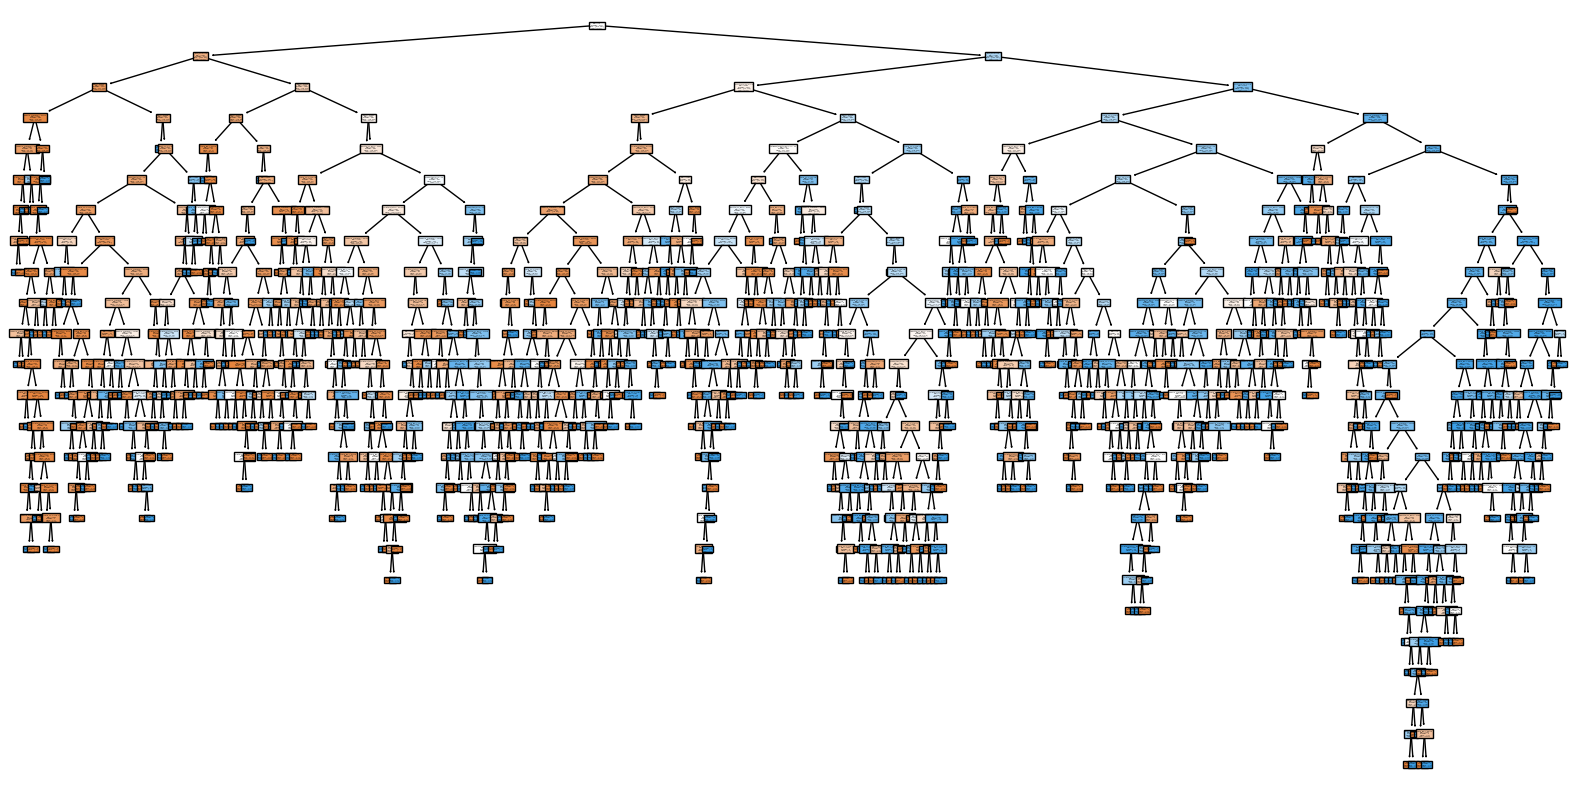

In [81]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf_B1, feature_names=X_train_B1.columns, class_names=["NoCHD","CHD"], filled=True)
plt.show()


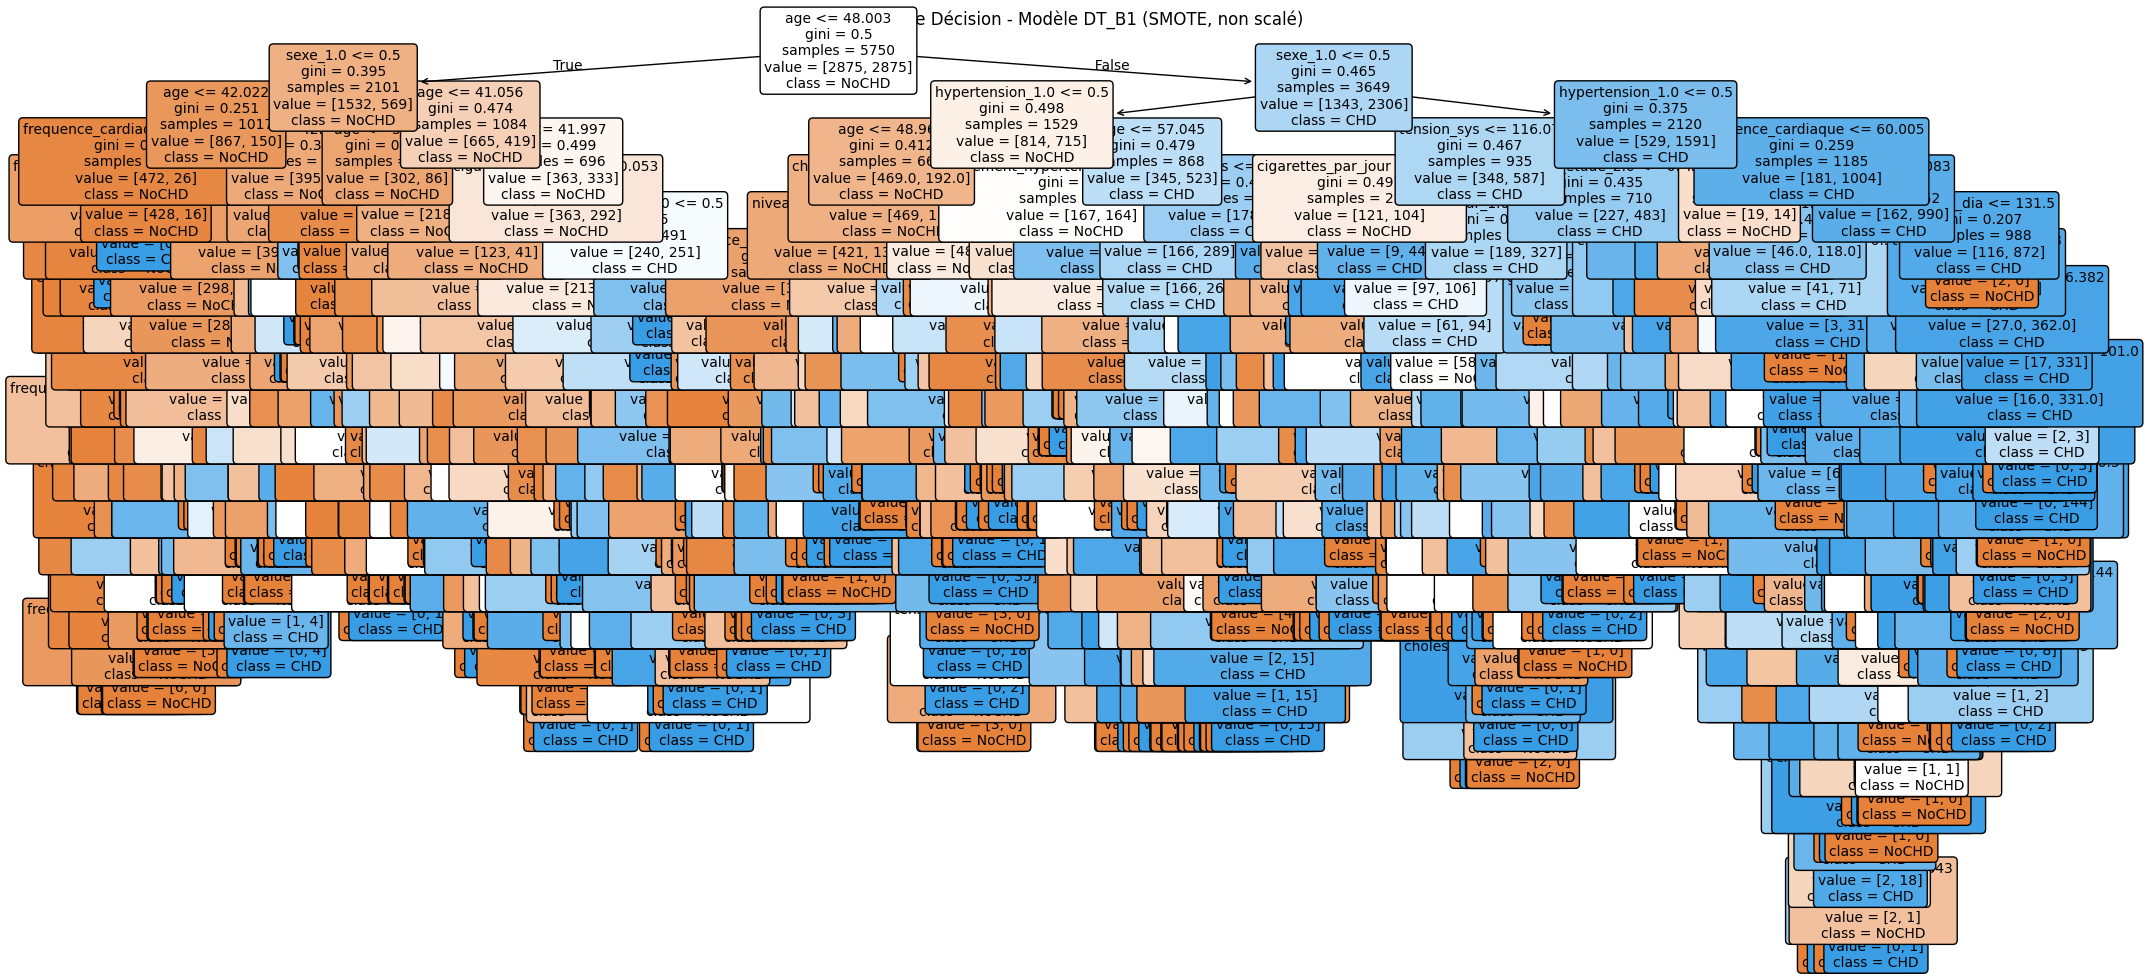

In [82]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))   # grande figure pour bien voir
tree.plot_tree(
    clf_B1,
    feature_names=X_train_B1.columns,
    class_names=["NoCHD", "CHD"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Arbre de Décision - Modèle DT_B1 (SMOTE, non scalé)")
plt.show()
